y of make_blobs dataset(the label of clusters?):
[1 4 4 1 2 1 2 4 0 0]
The predicted indexes of the clusters are:
[2 4 4 2 1 2 1 4 0 0]
True
Centroids:
[[-2.64387445  9.04103329]
 [-6.88093348 -6.9950069 ]
 [ 4.71067027  1.98409754]
 [-8.91925181  7.38961974]
 [ 2.14065099  4.38989034]]
Prediction on new sample data of 4 points:
[0 0 4 1]


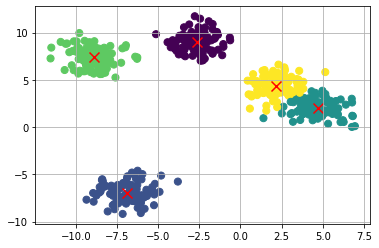

Voronoi tessellation


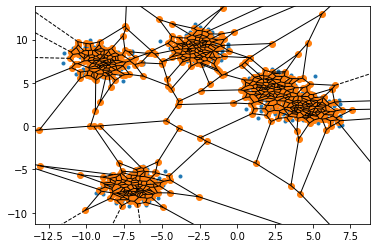

Soft voting scores for new data(distance of instances from every centroid):
[[ 2.64 17.41  8.45  9.06  5.08]
 [ 4.06 12.61  8.28  6.38  5.18]
 [ 7.71 19.13  6.02 13.93  4.61]
 [13.25  3.54 11.41 12.05 11.02]]


In [7]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x,y=make_blobs(n_samples=500,n_features=2,centers=5,cluster_std=1,random_state=42)
#n_samples specifies no of training instances, n_features specifies no of features for each training instance
print('y of make_blobs dataset(the label of clusters?):')
print(y[:10])
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(x)
#we have to specify the no of clusters that need to be identified
# In the context ofclustering, an instance’s label is the index of the cluster to which the algorithm assigns this instance
print('The predicted indexes of the clusters are:')
print(y_pred[:10])
print(y_pred is kmeans.labels_)
#y_pred and kmeans.labels_ are two arrays that contain cluster assignments for each data point
#IMP: the predicted labels y_pred do not match with y as they have different labelling schemes

print('Centroids:')
print(kmeans.cluster_centers_)
new_x=np.array([[0,9],[-3,5],[5,8],[-5,-4]])
print('Prediction on new sample data of 4 points:')
print(kmeans.predict(new_x))
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,cmap='viridis',s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,marker='x',c='red')
plt.grid(True)
plt.show()

print('Voronoi tessellation')
from scipy.spatial import Voronoi,voronoi_plot_2d
vor=Voronoi(x)
voronoi_plot_2d(vor)
plt.show()

print('Soft voting scores for new data(distance of instances from every centroid):')
print(kmeans.transform(new_x).round(2))

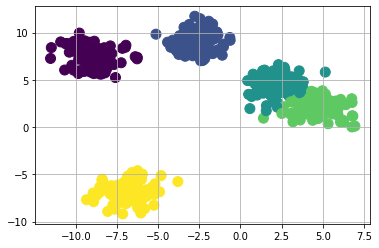

Inertia of the kmeans algorithm:
923.9931490057968
Score(negative inertia)
-923.9931490057968


In [8]:
#centroid may not converge to right point, we can initialise it in the region we exoect centroid to be
good_init= np.array([[-10,10], [-2.5,10], [2.5,5], [5,3], [-7.5,-3]])
kmeans=KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
#n_init=1 means it will run different iterations on one initialization of centroid coordinates
kmeans.fit(x)
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,s=100)
plt.grid(True)
plt.show()

#Alter method of running kmeans algo with diff random initializations and choosing best one
#performance metric is inertia which is sum of squared distances b/w instance and centroid

print('Inertia of the kmeans algorithm:')
print(kmeans.inertia_)
print('Score(negative inertia)')
print(kmeans.score(x))

Silhouette score of the kmeans model is:
0.6786441315351273
Obtained optimal k value from silhouette scores array
4
Silhouette score plotted against k:


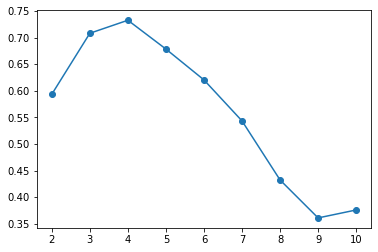

In [9]:
from sklearn.metrics import silhouette_score
#silhouette score is the mean of silhouette coefficients of all instances
print('Silhouette score of the kmeans model is:')
print(silhouette_score(x,kmeans.labels_))
#silhouette score=1 means point is deep inside correct cluster, -1 means its in wrong cluster,0 means close to cluster boundary
k_values=range(2,11)
silhouette_arr=[]
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x)
    sil_score=silhouette_score(x,kmeans.labels_)
    silhouette_arr.append(sil_score)

index=np.argmax(silhouette_arr)
optimal_kvalue=k_values[index]
print('Obtained optimal k value from silhouette scores array')
print(optimal_kvalue)
print('Silhouette score plotted against k:')
plt.plot(k_values,silhouette_arr,marker='o')
plt.show()

Dimensions of the image
(149, 229, 4)


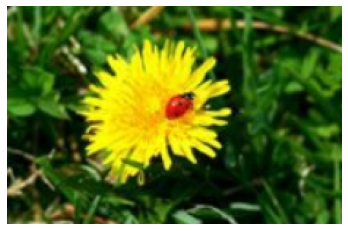

SEGMENTED IMAGE:


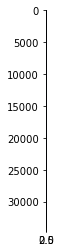

In [10]:
import PIL
image = np.asarray(PIL.Image.open('artwork3.PNG'))
print('Dimensions of the image')
print(image.shape)
#first entry is height of image, second is width of image, third is no of color channels(rgb)
plt.imshow(image)
plt.axis('off')
plt.show()

x = image.reshape(-1, 4)

#reduces 3d array to 2d
#returns rgb values for every pixel(each row), -1 mean it will take as many rows as necessary
kmeans=KMeans(n_clusters=8,random_state=42).fit(x)
segmented_img=kmeans.cluster_centers_[kmeans.labels_]
#cluster_centers contains rgb values of cluster centers as array, kmeans.labels returns index of cluster for every pixel
segmented_img.reshape(image.shape)

print('SEGMENTED IMAGE:')
plt.imshow(segmented_img)
plt.show()


x of load_digits dataset:
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


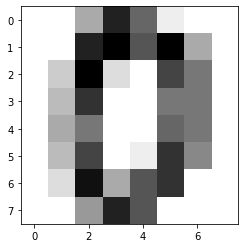

Score after training logistic regression model on 50 labels:
0.7481108312342569
The distance b/w each instance and its centroid is:
[[53.8347602  41.42507119 40.38645515 ... 46.70298587 43.32913642
  41.73144964]
 [22.96665235 50.3636375  45.70161035 ... 48.27458499 43.06000537
  50.03512655]
 [29.42934195 50.1412468  43.36356873 ... 50.49457617 47.66591091
  53.60050269]
 ...
 [34.4658627  45.79488681 50.33240978 ... 37.23576536 41.94611499
  46.89542148]
 [50.25497347 44.76556089 32.15096899 ... 50.32860905 45.97800085
  48.2667645 ]
 [49.33114998 42.88335888 35.48398764 ... 52.0054698  45.73744705
  48.55252025]]
Score of logistic regression model now that we have lables repping every cluster instead of random instances:
0.8261964735516373
Score of the logistic regression model after its been trained on propogated labels:
0.8790931989924433


In [24]:
#CLUSTERING FOR SEMI SUPERVISED LEARNING
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
x_digits,y_digits=load_digits(return_X_y=True)#has 1700 instances, we have to spcify it to return x and y
x_train,y_train=x_digits[:1400],y_digits[:1400]
x_test,y_test=x_digits[1400:],y_digits[1400:]

print('x of load_digits dataset:')
print(x_train[0])#array of intensities?
plt.imshow(x_train[0].reshape(8,8),cmap='binary')
plt.show()

n_labels=50#assume we have labels for 50 instances
log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(x_train[:n_labels],y_train[:n_labels])
print('Score after training logistic regression model on 50 labels:')
print(log_reg.score(x_test,y_test))

k=50
kmeans=KMeans(n_clusters=k,random_state=42)
x_digits_dist=kmeans.fit_transform(x_train) #fit_transform returns distance of each instance from its corresponding centroid
#clustering algorithm works in multidimensional space as each instance has 64 dimensions(its an image)
print('The distance b/w each instance and its centroid is:')
print(x_digits_dist[:50])
#each row represents the distance of one instance from all centroids
rep_digit_index=np.argmin(x_digits_dist,axis=0)#minimum distance from each column
x_rep_digits=x_train[rep_digit_index]#array of points closest to each centroid ie 50 instances

y_rep_digits=np.array([
1,3,6,0,7,9,2,4,8,9,5,4,7,1,2,6,8,2,5,1,4,1,3,3,8,8,2,5,6,9,1,4,0,6,8,3,4,6,7,2,4,1,0,7,5,1,9,9,3,7])
#these are the labels of the 50 digits representative of every cluster in x_rep_digits
print('Score of logistic regression model now that we have lables repping every cluster instead of random instances:')
log_reg=LogisticRegression(max_iter=10_000)
log_reg.fit(x_rep_digits,y_rep_digits)
print(log_reg.score(x_test,y_test))

#LABEL PROPOGATION
k=50 #no of clusters
y_train_prop=np.empty(len(x_train),dtype=np.int64)
#creates empty array having length=x_train
for i in range(k):
    y_train_prop[kmeans.labels_==i]=y_rep_digits[i]
#the rows of x_train which have been assigned label of corresponding cluster is assigned that cluster's label in y_train_prop
#filtering
log_reg=LogisticRegression(max_iter=10_0000)
log_reg.fit(x_train,y_train_prop)
print('Score of the logistic regression model after its been trained on propogated labels:')
print(log_reg.score(x_test,y_test))

The labels of the instances after fitting DBSCAN are as follows:
[ 0  1  2  2  3 -1  3  2  3 -1  2  2  4  0  4  0 -1  0 -1  4 -1  4  2 -1
  0  0  4  3  0  2  4  5  1  5 -1  1  3  4  0 -1  4 -1  1  0 -1  2  2  4
  3 -1  4 -1  4  0  5  4  2  5  0 -1 -1  1  5 12  2  5  2  3  3  2  2  2
  0 -1  3  3  0  1 -1  2  4  0  3  4  3  2  4  2  2  0  0 10  0  0  2  6
  0  2  2  2]
Indices of the core instances(first 10):
[ 0  1  2  3  4  6  7  8 10 11]
The core instances themselves are:
[[-0.17275142  0.97868253]
 [ 1.03213611  0.15561946]
 [ 1.13493827 -0.44821573]
 [ 0.0380911   0.34795828]
 [ 1.44064577 -0.37765855]
 [ 1.58022947 -0.23095166]
 [ 0.45471709 -0.20751073]
 [ 1.86642208 -0.27032002]
 [ 0.71670867 -0.69507977]
 [ 0.80916948 -0.490073  ]]
The clustering visualization:


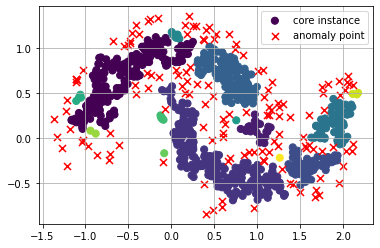

Using fit_transform ono DBSCAN:
[ 0  1  2  2  3 -1  3  2  3 -1  2  2  4  0  4  0 -1  0 -1  4 -1  4  2 -1
  0  0  4  3  0  2  4  5  1  5 -1  1  3  4  0 -1  4 -1  1  0 -1  2  2  4
  3 -1  4 -1  4  0  5  4  2  5  0 -1 -1  1  5 12  2  5  2  3  3  2  2  2
  0 -1  3  3  0  1 -1  2  4  0  3  4  3  2  4  2  2  0  0 10  0  0  2  6
  0  2  2  2]
Prediction on new data:
[0 2 2 5 5]
Probability prediction:
[[0.74 0.   0.1  0.   0.   0.   0.   0.   0.   0.1  0.02 0.04 0.   0.  ]
 [0.24 0.   0.62 0.   0.04 0.   0.   0.   0.   0.1  0.   0.   0.   0.  ]
 [0.   0.44 0.52 0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.02]
 [0.   0.   0.   0.   0.   0.94 0.   0.   0.   0.   0.   0.   0.06 0.  ]
 [0.   0.   0.   0.   0.34 0.6  0.   0.   0.   0.   0.   0.   0.06 0.  ]]


In [50]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=1000,noise=0.15)
dbscan=DBSCAN(eps=0.08,min_samples=5)
dbscan.fit(x)
print('The labels of the instances after fitting DBSCAN are as follows:')
print(dbscan.labels_[:100])
#if cluster index is -1 they are considered anomalies

print('Indices of the core instances(first 10):')
print(dbscan.core_sample_indices_[:10])
print('The core instances themselves are:')
print(dbscan.components_[:10])

print('The clustering visualization:')
labels=dbscan.labels_
core_indices=dbscan.core_sample_indices_
x_core=x[core_indices]
y_core=y[core_indices]
plt.scatter(x_core[:,0],x_core[:,1],c=labels[core_indices],s=50,label='core instance')
plt.scatter(x[labels==-1][:,0],x[labels==-1][:,1],marker='x',c='red',s=50,label='anomaly point')
plt.grid(True)
plt.legend()
plt.show()
#keep reducing epsilon hyperparameter and see the changes

print('Using fit_transform ono DBSCAN:')
print(dbscan.fit_predict(x)[:100])
#dbscan does not have a predict()

#for prediction we can use KNeighboursClassifier
from sklearn.neighbors import KNeighborsClassifier
k_clf=KNeighborsClassifier(n_neighbors=50)
k_clf.fit(dbscan.components_,dbscan.labels_[core_indices])
#KNeighborsClassifier uses the labels generated by DBSCAN for fitting
x_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1],[488,900]])
print('Prediction on new data:')
print(k_clf.predict(x_new))
print('Probability prediction:')
print(k_clf.predict_proba(x_new))

In [55]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=3,n_init=3)
#n_init=3 means it will run with 3 diff initializations
gm.fit(x)
print('Weights of the clusters:')
print(gm.weights_) #proportion of instances
print('Means of each gaussian distribution/cluster:')
print(gm.means_) #each array contains x mean and y mean
print('covariance matrix of every cluster/gaussian distribution')
print(gm.covariances_)

print('Prediction of gaussian mixture model(index of cluster):')
print(gm.predict(x)[:10])
print('Prediction probability of gaussian mixture model:')
print(gm.predict_proba(x)[:10]) #soft voting

print('Finding the density at a point:')
print(gm.score_samples(x)[:10])#returns log of pdf

Weights of the clusters:
[0.24053141 0.25907382 0.50039477]
Means of each gaussian distribution/cluster:
[[ 1.65908651 -0.1099678 ]
 [-0.58870624  0.6508023 ]
 [ 0.52208302  0.21171764]]
covariance matrix of every cluster/gaussian distribution
[[[ 0.10318966  0.08000336]
  [ 0.08000336  0.11544403]]

 [[ 0.13834332  0.09868916]
  [ 0.09868916  0.12151491]]

 [[ 0.14101181 -0.03104088]
  [-0.03104088  0.2561246 ]]]
Prediction of gaussian mixture model(index of cluster):
[1 2 0 2 0 1 0 2 0 1]
Prediction probability of gaussian mixture model:
[[3.90749106e-33 8.78339189e-01 1.21660811e-01]
 [2.30464019e-03 5.68755532e-16 9.97695360e-01]
 [6.69039036e-01 5.02601577e-28 3.30960964e-01]
 [9.18255975e-18 2.60908722e-03 9.97390913e-01]
 [9.59479296e-01 3.87620201e-33 4.05207037e-02]
 [7.55509007e-31 6.04192271e-01 3.95807729e-01]
 [9.85058463e-01 3.54911275e-33 1.49415375e-02]
 [2.29290366e-06 4.09942162e-13 9.99997707e-01]
 [9.95921973e-01 4.80484016e-40 4.07802662e-03]
 [2.63939200e-50 9.992